In [1]:
!pip install matplotlib pandas networkx version_information
%load_ext version_information
%version_information py2neo

  Preparing metadata (setup.py) ... done
  Created wheel for version_information: filename=version_information-1.0.4-py3-none-any.whl size=3895 sha256=50ad37269207bef2cbb7b7277e1c75698d8fc1eff365acfcf2d8a0d88a5fa890
  Stored in directory: /root/.cache/pip/wheels/81/48/43/91109adffe66267dfa0c5c27c05269409bc131d850c0fd386b
Successfully built version_information


Software versions
Python 3.10.12 64bit [GCC 11.4.0]
IPython 7.34.0
OS Linux 6.1.85+ x86_64 with glibc2.35
py2neo The 'py2neo' distribution was not found and is required by the application
Thu Sep 26 08:50:14 2024 UTC

In [2]:
!pip install pm4py

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 18.8 MB/s eta 0:00:00
  Created wheel for intervaltree: filename=intervaltree-3.1.0-py2.py3-none-any.whl size=26096 sha256=7e8fd3f524de834d9afbed360531d40524e944ab100529a0e7c54f6a3a70d820
  Stored in directory: /root/.cache/pip/wheels/fa/80/8c/43488a924a046b733b64de3fac99252674c892a4c3801c0a61
Successfully built intervaltree


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
import os
os.chdir('/content/drive/MyDrive/share_rpi_2024/2024_multiperspective')

In [11]:
os.getcwd()

'/content/drive/.shortcut-targets-by-id/17Nn6Rzy7fUkhPJSL8DuFlXuL5Uut4SXI/share_rpi_2024/2024_multiperspective'

In [17]:
import pandas as pd
import pm4py
from datetime import datetime, timedelta
import random


dataframe = pd.read_csv('data/datacsv_repair.csv', sep=';')
# Assuming 'dataframe' is your DataFrame and 'timestamp' is the column name
start_time = datetime.now()
dataframe['timestamp'] = [start_time + timedelta(seconds=i*15 + random.randint(0, 15)) for i in range(len(dataframe))]
dataframe = pm4py.format_dataframe(dataframe, case_id='case_id', activity_key='activity', timestamp_key='timestamp')
event_log = pm4py.convert_to_event_log(dataframe)

In [19]:
dataframe

,case_id,activity,resource,timestamp,case:concept:name,concept:name,time:timestamp,@@index,@@case_index
0,1,Receive an item and repair request,John,2024-09-26 09:02:38.654701,1,Receive an item and repair request,2024-09-26 09:02:38.654701,0,0
1,1,Check the item,Mike,2024-09-26 09:03:00.654701,1,Check the item,2024-09-26 09:03:00.654701,1,0
2,1,Check the warranty,John,2024-09-26 09:03:23.654701,1,Check the warranty,2024-09-26 09:03:23.654701,2,0
3,1,Notify the customer,Sue,2024-09-26 09:03:25.654701,1,Notify the customer,2024-09-26 09:03:25.654701,3,0
4,1,Repair the item,Pete,2024-09-26 09:03:40.654701,1,Repair the item,2024-09-26 09:03:40.654701,4,0
5,1,Issue payment,Jane,2024-09-26 09:03:54.654701,1,Issue payment,2024-09-26 09:03:54.654701,5,0
6,1,Return the item,Sue,2024-09-26 09:04:20.654701,1,Return the item,2024-09-26 09:04:20.654701,6,0
7,2,Receive an item and repair request,John,2024-09-26 09:04:34.654701,2,Receive an item and repair request,2024-09-26 09:04:34.654701,7,1
8,2,Check the warranty,John,2024-09-26 09:04:52.654701,2,Check the warranty,2024-09-26 09:04:52.654701,8,1
9,2,Check the item,Fred,2024-09-26 09:05:08.654701,2,Check the item,2024-09-26 09:05:08.654701,9,1


In [ ]:
event_log

In [20]:
import os

net, initial_marking, final_marking = pm4py.discover_petri_net_inductive(event_log)

In [22]:
!apt-get install graphviz -y

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


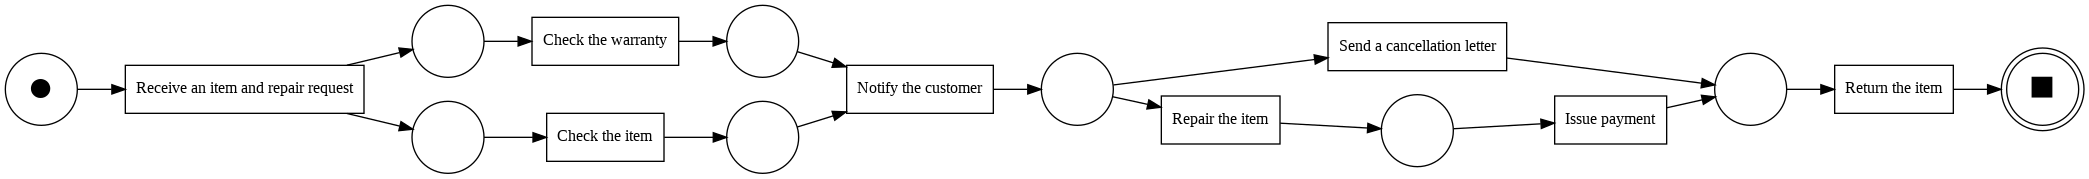

In [24]:
from pm4py.visualization.petri_net import visualizer as pn_visualizer
gviz = pn_visualizer.apply(net, initial_marking, final_marking)
pn_visualizer.view(gviz)

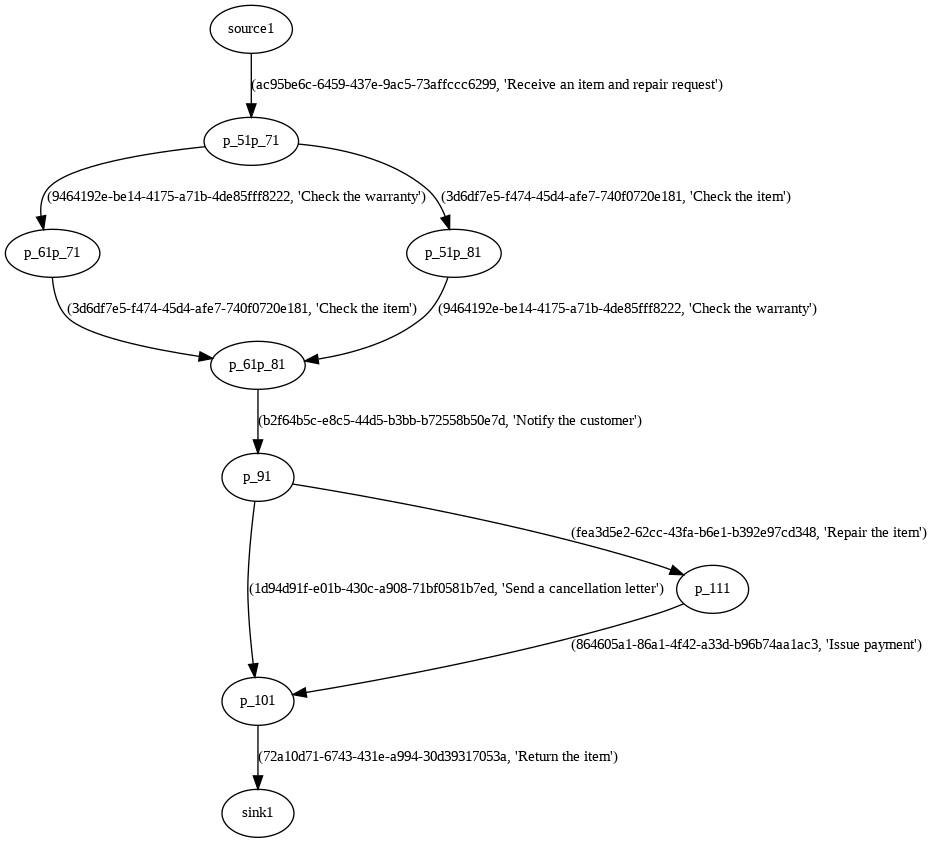

In [26]:
from pm4py.objects.petri_net.utils import reachability_graph
from pm4py.visualization.transition_system import visualizer as ts_visualizer

ts = reachability_graph.construct_reachability_graph(net, initial_marking)

gviz = ts_visualizer.apply(ts, parameters={ts_visualizer.Variants.VIEW_BASED.value.Parameters.FORMAT: "png"})
ts_visualizer.view(gviz)

In [ ]:
from neo4j import GraphDatabase
uri = "bolt://localhost:7687"
user = 'neo4j'
password = 'faset123'

driver = GraphDatabase.driver(uri=uri, auth=(user,password))
session=driver.session()

In [ ]:
# Acuan nama transition di model proses
trans_name = []
for t in net.transitions:
    trans_name.append(t.label)
trans_name.append('START')
trans_name.append('END')
print(trans_name)

['Receive an item and repair request', 'Check the item', 'Check the warranty', 'Notify the customer', 'Send a cancellation letter', 'Repair the item', 'Issue payment', 'Return the item', 'START', 'END']


In [ ]:
# Acuan nama transition yang perlu baca tipe team
trans_team = ['Check the item', 'Notify the customer', 'Send a cancellation letter', 'Repair the item', 'Issue payment', 'Return the item']

In [ ]:
### generate the RG in Neo4j

# Cipher untuk membuat RG di Neo4J
def createState(tx, state):
    tx.run("CREATE (:State {name: $state})", state=state)
    return None
def createRelationship(tx, state_source, transition_name, transition_label, state_target):
    tx.run('''
    MATCH (x:State),(y:State)
    WHERE x.name = $state_source AND y.name = $state_target
    MERGE (x)-[:Transition {name: $transition_name, label:$transition_label}]->(y)
    ''', state_source=state_source, transition_name=transition_name, transition_label=transition_label, state_target=state_target)
    return None

# Generate REACHABILITY GRAPH di neo4j dari objek model Petrinet
def generate_rg_on_neo4j(net):
    #session.run("MATCH (N) detach delete (N)")

    for s in ts.states:
        sname = s.name
        createState(session, sname)

    for t in net.transitions:
        tname = t.name
        if t.name not in trans_name:
            tlabel = 'Invisible'
        else:
            tlabel = t.name

        source = t.from_state
        target = t.to_state

        createRelationship(session, source.name, t.name, tlabel, target.name)
    return None


In [ ]:
# Cipher untuk membuat petrinet di Neo4J
def createTransition(tx, tname, tlabel):
    tx.run("CREATE (:Transition {type:'master', name: $tname, label: $tlabel })", tname=tname, tlabel=tlabel)
    return None
def createPlace(tx, place):
    tx.run("CREATE (:Place {type:'master', label: 'Invisible', name: $place, token:0, c:0, p:0, m:0, fm:0, inv_incoming: false})", place=place)
    return None
def createRelationship_place_to_transition(tx, place_name, transition_name):
    tx.run('''
    MATCH (x:Place), (y:Transition)
    WHERE x.name = $place_name AND y.name = $transition_name
    MERGE (x)-[:Arc {type:'master', name: $place_name+'_'+$transition_name, f:0, c:0}]->(y)
    ''', place_name=place_name, transition_name=transition_name)
    return None
def createRelationship_transition_to_place(tx, transition_name, place_name):
    tx.run('''
    MATCH (x:Transition), (y:Place)
    WHERE x.name = $transition_name AND y.name = $place_name
    MERGE (x)-[:Arc {type:'master', name: $transition_name+'_'+$place_name, f:0, p:0}]->(y)
    ''', place_name=place_name, transition_name=transition_name)
    return None
def setMasterInitialMarking(tx, im_name):
    tx.run('''
    MATCH (im:Place {name:$im_name})
    SET im.type = 'master', im.im = True, im.token = 1, im.p = 1
    ''', im_name=im_name)
    return None
def setMasterFinalMarking(tx, fm_name):
    tx.run('''
    MATCH (x:Place {name:$fm_name})
    SET x.fm = True
    ''', fm_name=fm_name)
    return None

In [ ]:
# Generate model petrinet di neo4j dari objek model Petrinet
def start_environtmen(net):
    session.run("MATCH (N) detach delete (N)")

    generate_rg_on_neo4j(ts)

    for t in net.transitions:
        if t.label == None:
            tlabel = 'Invisible'
        else:
            tlabel = t.label
        tname = t.name
        createTransition(session, tname, tlabel)

    for p in net.places:
        createPlace(session, p.name)

    for arc in net.arcs:
        source = arc.source
        target = arc.target
        source_class = source.__class__.__name__
        target_class = target.__class__.__name__

        if source_class == 'Place':
            place_name = source.name
            transition_name = target.name
            createRelationship_place_to_transition(session, place_name, transition_name)
        else: # transition
            transition_name = source.name
            place_name = target.name
            createRelationship_transition_to_place(session, transition_name, place_name)

    im_name = [im for im in initial_marking][0].name
    setMasterInitialMarking(session, im_name)

    fm_name = [fm for fm in final_marking][0].name
    setMasterFinalMarking(session, fm_name)
    return None


In [ ]:
# start_environtmen(net)

In [ ]:
# Cypher to create organizational model
# Cipher untuk membuat petrinet di Neo4J

# contoh entity
# entity_name = team, entity

def createEntity(tx, eName):
    tx.run("CREATE (:Entity {eName:$eName })", eName=eName)
    return None

# def createOrgUnit(tx):
#     createEntity(tx, 'orgUnit')
#     return None
# def createTeam(tx):
#     createEntity(tx, 'team')
#     return None
# def createRole(tx):
#     createEntity(tx, 'role')
    return None

def createResource(tx, rName):
    tx.run("CREATE (:Resource {rName: $rName})", rName=rName)
    return None

def createProductTypeVariable(tx, name, prodType):
    tx.run("CREATE (:Variable {type:'master', name:$name, team: $prodType})", name=name, prodType=prodType)
    return None

In [ ]:
teams = ['Team', 'Mobile Phone team','GPS team','Customer Service team']
roles = ['Structural', 'Clerk', 'Engineer Manager', 'Engineer','Financial Administrator']
originators = ['John','Sue','Clare','Mike','Pete','Fred','Robert','Jane','Mona']

In [ ]:
# fungsi relasi
def createRelationship_team_to_ou(tx):
    tx.run('''
    MATCH (x:Team), (y:OrgUnit)
    MERGE (x)-[:isA]->(y)
    ''')
    return None
def createRelationship_role_to_ou(tx):
    tx.run('''
    MATCH (x:Role), (y:OrgUnit)
    MERGE (x)-[:isA]->(y)
    ''')
    return None

def createRelationship_resource_to_Entity(tx, rName, eName ):
    tx.run('''
    MATCH (x:Resource {rName:$rName}), (y:Entity {eName:$eName})
    MERGE (x)<-[:ROLE]-(y)
    ''', rName=rName, eName=eName)


def createRelationship_resource_to_Role(tx, rName, eName ):
    tx.run('''
    MATCH (x:Resource {rName:$rName}), (y:Role {eName:$eName})
    MERGE (x)<-[:ROLE]-(y)
    ''', rName=rName, eName=eName)
    return None
def createRelationship_resource_to_Team(tx, rName, tName ):
    tx.run('''
    MATCH (x:Resource {rName:$rName}), (y:Team {tName:$tName})
    MERGE (x)<-[:TEAM]-(y)
    ''', rName=rName, tName=tName)
    return None

In [ ]:
def createRelationship_entity_supervise_entity(tx, eName1, eName2 ):
    tx.run('''
    MATCH (x:Entity {eName:$eName1}), (y:Entity {eName:$eName2})
    MERGE (x)-[:SUPERVISED_BY]->(y)
    ''', eName1=eName1, eName2=eName2)

def createRelationship_entity_to_root(tx, eName, rootName ):
    tx.run('''
    MATCH (x:Entity {eName:$eName}), (y:Entity {eName:$rootName})
    MERGE (x)-[:TO_ROOT]->(y)
    ''', eName=eName, rootName=rootName)


def createRelationship_task_to_entity(tx, label, eName ):
    tx.run('''
    MATCH (x:Transition {label:$label}), (y:Entity {eName:$eName})
    MERGE (x)-[:EXECUTED_BY]->(y)
    ''', label=label, eName=eName)

def createRelationship_task_to_role(tx, label, eName ):
    tx.run('''
    MATCH (x:Transition {label:$label}), (y:Role {eName:$eName})
    MERGE (x)-[:EXECUTED_BY]->(y)
    ''', label=label, eName=eName)
    return None
def createRelationship_task_to_team(tx, label, tName ):
    tx.run('''
    MATCH (x:Transition {label:$label}), (y:Team {tName:$tName})
    MERGE (x)-[:EXECUTED_BY]->(y)
    ''', label=label, tName=tName)
    return None

# write variable
def createRelationship_task_to_variable(tx, label, name ):
    tx.run('''
    MATCH (x:Transition {label:$label}), (y:Variable {name:$name})
    MERGE (x)-[:WRITE]->(y)
    ''', label=label, name=name)
    return None

# read variable
def createRelationship_variable_to_task(tx, var_name, label):
    tx.run('''
    MATCH (y:Variable {name:$var_name}),(x:Transition {label:$label})
    MERGE (y)-[:READ]->(x)
    ''', label=label, var_name=var_name)
    return None

In [ ]:
# createRelationship_variable_to_task(session, 'product_type', 'Check the item')

In [ ]:
def generate_organizational_model():
    # Buat model organisasi
    # createOrgUnit(session)

    for team in teams:
        createEntity(session, team)

    for role in roles:
        createEntity(session, role)

    for name in originators:
        createResource(session, name)


    # Relasi entiti ke entiti
    createRelationship_entity_supervise_entity(session, 'Engineer', 'Engineer Manager' )
    createRelationship_entity_to_root(session, 'Clerk', 'Structural' )
    createRelationship_entity_to_root(session, 'Financial Administrator', 'Structural' )
    createRelationship_entity_to_root(session, 'Engineer Manager', 'Structural' )
    createRelationship_entity_to_root(session, 'Customer Service team', 'Team' )
    createRelationship_entity_to_root(session, 'Mobile Phone team', 'Team' )
    createRelationship_entity_to_root(session, 'GPS team', 'Team' )


    # Eksekusi resource ke organizational unit
    createRelationship_resource_to_Entity(session, 'John', 'Clerk')
    createRelationship_resource_to_Entity(session, 'Sue', 'Clerk')
    createRelationship_resource_to_Entity(session, 'Clare', 'Clerk')
    createRelationship_resource_to_Entity(session, 'Mike', 'Engineer Manager')
    createRelationship_resource_to_Entity(session, 'Pete', 'Engineer')
    createRelationship_resource_to_Entity(session, 'Fred', 'Engineer')
    createRelationship_resource_to_Entity(session, 'Robert', 'Engineer')
    createRelationship_resource_to_Entity(session, 'Jane', 'Financial Administrator')
    createRelationship_resource_to_Entity(session, 'Mona', 'Financial Administrator')

    createRelationship_resource_to_Entity(session, 'John', 'Customer Service team')
    createRelationship_resource_to_Entity(session, 'Sue', 'Mobile Phone team')
    createRelationship_resource_to_Entity(session, 'Clare', 'GPS team')
    createRelationship_resource_to_Entity(session, 'Mike', 'Mobile Phone team')
    createRelationship_resource_to_Entity(session, 'Pete', 'Mobile Phone team')
    createRelationship_resource_to_Entity(session, 'Fred', 'GPS team')
    createRelationship_resource_to_Entity(session, 'Robert', 'GPS team')
    createRelationship_resource_to_Entity(session, 'Jane', 'Mobile Phone team')
    createRelationship_resource_to_Entity(session, 'Mona', 'GPS team')

    # Eksekusi relationship aktifitas (model proses) ke organizational model

    createRelationship_task_to_entity(session, 'Receive an item and repair request', 'Customer Service team' )
    createRelationship_task_to_entity(session, 'Receive an item and repair request', 'Clerk' )

    createRelationship_task_to_entity(session, 'Check the warranty', 'Customer Service team' )
    createRelationship_task_to_entity(session, 'Check the warranty', 'Clerk' )

    createRelationship_task_to_entity(session, 'Check the item', 'Engineer' )
    createRelationship_task_to_entity(session, 'Check the item', 'GPS team' )
    createRelationship_task_to_entity(session, 'Check the item', 'Mobile Phone team' )

    createRelationship_task_to_entity(session, 'Notify the customer', 'Clerk' )
    createRelationship_task_to_entity(session, 'Notify the customer', 'GPS team' )
    createRelationship_task_to_entity(session, 'Notify the customer', 'Mobile Phone team' )

    createRelationship_task_to_entity(session, 'Repair the item', 'Engineer' )
    createRelationship_task_to_entity(session, 'Repair the item', 'GPS team' )
    createRelationship_task_to_entity(session, 'Repair the item', 'Mobile Phone team' )

    createRelationship_task_to_entity(session, 'Issue payment', 'Financial Administrator' )
    createRelationship_task_to_entity(session, 'Issue payment', 'GPS team' )
    createRelationship_task_to_entity(session, 'Issue payment', 'Mobile Phone team' )

    createRelationship_task_to_entity(session, 'Send a cancellation letter', 'Clerk' )
    createRelationship_task_to_entity(session, 'Send a cancellation letter', 'GPS team' )
    createRelationship_task_to_entity(session, 'Send a cancellation letter', 'Mobile Phone team' )

    createRelationship_task_to_entity(session, 'Return the item', 'Clerk' )
    createRelationship_task_to_entity(session, 'Return the item', 'GPS team' )
    createRelationship_task_to_entity(session, 'Return the item', 'Mobile Phone team' )


    createProductTypeVariable(session, 'product_type', '') # team masih kosong
    createRelationship_task_to_variable(session, 'Receive an item and repair request', 'product_type' )



    #read
    createRelationship_variable_to_task(session, 'product_type', 'Check the item' )
    createRelationship_variable_to_task(session, 'product_type', 'Notify the customer' )
    createRelationship_variable_to_task(session, 'product_type', 'Send a cancellation letter' )
    createRelationship_variable_to_task(session, 'product_type', 'Repair the item' )
    createRelationship_variable_to_task(session, 'product_type', 'Issue payment' )
    createRelationship_variable_to_task(session, 'product_type', 'Return the item')
    createRelationship_variable_to_task(session, 'product_type', 'Check the item' )
    createRelationship_variable_to_task(session, 'product_type', 'Check the item' )
    createRelationship_variable_to_task(session, 'product_type', 'Check the item' )



In [ ]:
#actor_entity
df_res_tab = pd.read_excel ('./data/resource_model.xlsx',sheet_name='actor_entity')
df_res_tab.set_index("actor", inplace = True)
df_res_tab

,orgStructure,orgTeam
actor,,
John,Clerk,Customer Service Team
Sue,Clerk,Mobile Phone team
Clare,Clerk,GPS team
Mike,Engineer Manager,Mobile Phone team
Pete,Engineer,Mobile Phone team
Fred,Engineer,GPS team
Robert,Engineer,GPS team
Jane,Financial Administrator,Mobile Phone team
Mona,Financial Administrator,GPS team


In [ ]:
df_res_tab.loc['Pete']['orgTeam']

'Mobile Phone team'

In [ ]:
#activity_entity

df_activity_entity = pd.read_excel ('./data/resource_model.xlsx',sheet_name='activity_entity')
df_activity_entity.set_index("activity", inplace = True)
df_activity_entity


,orgStructure,orgTeam,orgTeamVariableName
activity,,,
Receive an item and repair request,Clerk,Customer Service team,NaN
Check the warranty,Clerk,Customer Service team,NaN
Check the item,Engineer,variable,product_type
Notify the customer,Clerk,variable,product_type
Send a cancellation letter,Clerk,variable,product_type
Repair the item,Engineer,variable,product_type
Issue payment,Financial Administrator,variable,product_type
Return the item,Clerk,variable,product_type
START,NaN,NaN,NaN


In [ ]:
#activity_function

df_activity_function = pd.read_excel ('./data/resource_model.xlsx',sheet_name='activity_function')
df_activity_function.set_index("activity", inplace = True)
df_activity_function


,product_type
activity,
Receive an item and repair request,write
Check the warranty,NaN
Check the item,read
Notify the customer,read
Send a cancellation letter,read
Repair the item,read
Issue payment,read
Return the item,read
START,NaN


### Model replay image

In [ ]:
# cloning diidentifikasikan dari type di source place
# tiap cloning bisa dibuat dengan p_id baru
# p_id pada master diabaikan saja, krn hanya untuk diduplikasi oleh cloning nya

#https://neo4j.com/labs/apoc/4.2/overview/apoc.refactor/apoc.refactor.cloneSubgraphFromPaths/

def createCloneFromModelRef(p_id):
    q_rootNode ='''
        //MATCH path = (root {type:'master', im:True})-[*]->(m {fm:True}) # semua bagian graf yang akan di clone
        //WITH distinct root AS rootA
        //CALL apoc.refactor.cloneNodes([rootA])
        //YIELD input, output
        //WITH rootA, input, output AS rootB
        //SET rootB.type='clone', rootB.p_id = $p_id

        MaTCH (rootA:Place {type:'master', im:True}) // initial marking
        WITH distinct rootA
        CALL apoc.refactor.cloneNodes([rootA])
        YIELD input, output
        WITH rootA, input, output AS rootB
        SET rootB.type='clone', rootB.p_id = $p_id

        WITH rootA, rootB
        MATCH path = (rootA)-[*]->(node)
        WHERE node.type = 'master'
        WITH rootA, rootB, collect(distinct path) as paths
        CALL apoc.refactor.cloneSubgraphFromPaths(paths, {
            standinNodes:[[rootA, rootB]]
        })
        YIELD input, output, error
        WITH collect(DISTINCT output) AS nodes
        UNWIND nodes as node
        SET node.type = 'clone', node.p_id = $p_id

        RETURN node //input, output, error
    '''
    session.run(q_rootNode, p_id=p_id)

In [ ]:
p_id = '12345'
start_environtmen(net)
generate_organizational_model()
# createCloneFromModelRef(p_id)

### Buat data event log anomali

In [ ]:
df_ano = pd.read_csv('./data/datacsv_repair - anomali - v2.csv', sep=';')
df_anomali = pm4py.format_dataframe(df_ano, case_id='case_id', activity_key='activity', timestamp_key='timestamp')
# event_log_anomali = pm4py.convert_to_event_log(df_anomali)
df_anomali.index.name = 'index'
df_anomali = df_anomali.sort_index(ascending=True)

In [ ]:
df_anomali

,case:concept:name,concept:name,resource,time:timestamp,product_type,@@index
index,,,,,,
0,1,Receive an item and repair request,John,NaN,Mobile Phone team,0
1,2,Receive an item and repair request,John,NaN,GPS team,1
2,1,Notify the customer,Sue,NaN,NaN,2
3,3,Receive an item and repair request,John,NaN,Mobile Phone team,3
4,3,Check the item,Mike,NaN,NaN,4
5,2,Check the warranty,John,NaN,NaN,5
6,4,Receive an item and repair request,John,NaN,GPS team,6
7,3,Check the warranty,John,NaN,NaN,7
8,1,Check the item,Mike,NaN,NaN,8


In [ ]:
def generateAllCase():
#     df_one_case_ano = df_anomali[df_anomali['case:concept:name'] == case_id]
    aggregate_event_streams = []
    df_id = df_anomali['case:concept:name']
    df_activity = df_anomali['concept:name']
    df_originator = df_anomali['resource']
    df_prod_type_access = df_anomali['product_type']
    case_id_list = df_id.tolist()
    activity_list = df_activity.tolist()
    originator_list = df_originator.tolist()
    prod_type_lsit = df_prod_type_access.tolist()
    for (item1, item2, item3, item4) in zip(case_id_list, activity_list, originator_list, prod_type_lsit):
        event_streams.append([item1, item2, item3, item4])
    caseNum = 1
    for event in event_streams:
        if caseNum > 1: # kalau jumlah case lebih dari 1 digit
            for i in range(caseNum):
                aggregate_event_streams.append([(event[0] + str(i)), event[1], event[2], event[3]])
        else:
            aggregate_event_streams.append([event[0], event[1], event[2], event[3]])
    return aggregate_event_streams

In [ ]:
event_streams = []
aggregate_event_streams = []
aggregate_event_streams = generateAllCase()
event_streams

[['1', 'Receive an item and repair request', 'John', 'Mobile Phone team'],
 ['2', 'Receive an item and repair request', 'John', 'GPS team'],
 ['1', 'Check the item', 'Mike', nan],
 ['2', 'Check the warranty', 'John', nan],
 ['3', 'Receive an item and repair request', 'John', 'Mobile Phone team'],
 ['2', 'Check the item', 'Fred', nan],
 ['1', 'Check the warranty', 'John', nan],
 ['3', 'Check the item', 'Mike', nan],
 ['2', 'Notify the customer', 'Clare', nan],
 ['2', 'Send a cancellation letter', 'Clare', nan],
 ['4', 'Receive an item and repair request', 'John', 'GPS team'],
 ['1', 'Notify the customer', 'Sue', nan],
 ['3', 'Notify the customer', 'Sue', nan],
 ['1', 'Repair the item', 'Pete', nan],
 ['3', 'Repair the item', 'Pete', nan],
 ['4', 'Check the warranty', 'John', nan],
 ['1', 'Issue payment', 'Jane', nan],
 ['4', 'Check the item', 'Jane', nan],
 ['2', 'Return the item', 'Clare', nan],
 ['3', 'Issue payment', 'Jane', nan],
 ['4', 'Notify the customer', 'Clare', nan],
 ['1', '

In [ ]:
aggregate_event_streams

[['1', 'Receive an item and repair request', 'John', 'Mobile Phone team'],
 ['2', 'Receive an item and repair request', 'John', 'GPS team'],
 ['1', 'Check the item', 'Mike', nan],
 ['2', 'Check the warranty', 'John', nan],
 ['3', 'Receive an item and repair request', 'John', 'Mobile Phone team'],
 ['2', 'Check the item', 'Fred', nan],
 ['1', 'Check the warranty', 'John', nan],
 ['3', 'Check the item', 'Mike', nan],
 ['2', 'Notify the customer', 'Clare', nan],
 ['2', 'Send a cancellation letter', 'Clare', nan],
 ['4', 'Receive an item and repair request', 'John', 'GPS team'],
 ['1', 'Notify the customer', 'Sue', nan],
 ['3', 'Notify the customer', 'Sue', nan],
 ['1', 'Repair the item', 'Pete', nan],
 ['3', 'Repair the item', 'Pete', nan],
 ['4', 'Check the warranty', 'John', nan],
 ['1', 'Issue payment', 'Jane', nan],
 ['4', 'Check the item', 'Jane', nan],
 ['2', 'Return the item', 'Clare', nan],
 ['3', 'Issue payment', 'Jane', nan],
 ['4', 'Notify the customer', 'Clare', nan],
 ['1', '

### Fungsi GO-TR

In [ ]:
def getCurrentMarking(p_id):
    q_consumeFinalMarking ='''
            MATCH (cm:Place {p_id: $p_id})
            WHERE cm.token > 0
            RETURN collect(cm.name) AS current_marking
         '''
    results = session.run(q_consumeFinalMarking, p_id=p_id)

    for record in results:
        for e in record:
            return record[0]
# current_marking = getCurrentMarking(5)
# current_marking

def getFinalMarking(p_id):
    q_finalMarking ='''
            MATCH (p:Place {p_id: $p_id})
            WHERE p.fm > 0
            RETURN collect(p.name) AS finalMarking
         '''
    results = session.run(q_finalMarking, p_id=p_id)

    for record in results:
        for e in record:
            return record[0]
# current_marking = getCurrentMarking(5)
# current_marking


## Penelusuran invisible path

In [ ]:
def getAllEmptyInputPlaces(p_id, trans):
    q_getAllEmptyInputPlaces = '''
    MATCH (ip_mt: Place {p_id: $p_id})-->(e:Transition {label:$trans})
    WHERE ip_mt.token = 0
    RETURN ip_mt.name
    '''
    results = session.run(q_getAllEmptyInputPlaces, p_id=p_id, trans=trans)


    emptyInputPlaces = []
    for record in results:
        for ip_mt in record:
            emptyInputPlaces.append(ip_mt)
    return emptyInputPlaces

In [ ]:
def getAllInputPlaces(p_id, trans):
    q_getAllInputPlaces = '''
    MATCH (ip: Place {p_id: $p_id})-->(e:Transition {label:$trans})
    RETURN ip.name
    '''
    results = session.run(q_getAllInputPlaces, p_id=p_id, trans=trans)


    InputPlaces = []
    for record in results:
        for ip in record:
            InputPlaces.append(ip)
    return InputPlaces

In [ ]:
# current_marking, contoh: 'p_61'
# target marking, contoh ['p_1', 'p_5']
def checkCandidatesTargetStates(states, target_submarking):
    target_names = target_submarking

#     print(target_names)
    candidate_target_states = []
    for state in states: # periksa tiap state yang ada
        for i in range(len(target_names)): # apakah semua nama target ada dalam satu state?
#             print(target_names[i],'-->', state)
            if target_names[i] not in state: # jika ada nama target yang tidak ada dalam state ini maka break
                break
            if i == len(target_names)-1: # kalau semua nama target place ada dalam state ini maka tambahkan state sbg kandidat
                candidate_target_states.append(state)
    return candidate_target_states

In [ ]:
def findspf_rg(source_state, target_state):
    q_spf_rg = '''
        MATCH p = allshortestpaths((n {name:$source_state})-[:Transition *..100]->(m {name:$target_state}))
        with p, relationships(p) as rs, [t in relationships(p) | t.name] AS t_names
        WHERE ALL(t IN rs WHERE (t.label = 'Invisible'))
        RETURN length(p) as length, t_names
        limit 1
    '''
    results = session.run(q_spf_rg, source_state=source_state, target_state=target_state)

    emptyInputPlaces = []
    length = 0
    t_names = []
    for record in results:
        length = record[0]
        t_names = record[1]
    return length, t_names

In [ ]:
def check_invisible_path(current_state, candidate_target_states):
    spf_len = 1000
    spf_state = ''
    spf_trans = []
#     dummy_current_marking = 'source1'
    source_state = current_state

    for state in candidate_target_states:
#         print('source_state:', source_state)
#         print('state:', state)
        l, t_names = findspf_rg(source_state, state)
#         print(l,' ', state, ' ', spf_len)
        if l>0 and l < spf_len:
            spf_len = l
            spf_state = state # update state dengan jarak terpendek
            spf_trans = t_names
    return spf_state, spf_trans # state untuk update token, t_names untuk update p,c, dan frek

In [ ]:
# contoh state: p_121p_151, source1, sink1
def extractTokenPlace(state_to_extract, places):
    tokenPlaces = []
    for place in places:
        if place in state_to_extract:
            tokenPlaces.append(place)

    return tokenPlaces

In [ ]:
# contoh activate_transitions = ['skip_2', 'tauSplit_8']

def update_attributes(p_id, activate_transitions):
    q_update_state = '''
        with $activate_transitions AS ts
        WITH [i in range(0, size(ts)-1) | {t:ts[i]}] AS pairs
        UNWIND pairs as pair

        MATCH (ip {p_id:$p_id})-[r]->(tr:Transition)
        WHERE tr.name = pair.t
        SET r.f = r.f + 1, ip.token = ip.token - 1, ip.c = ip.c + 1, ip.fm = ip.fm - 1 //, r.c = r.c + 1

        WITH tr, pair
        MATCH (tr)-[s]->(op)
        //WHERE tr.name = pair.t
        WITH distinct s AS s, op
        SET  s.f = s.f + 1, op.token = op.token + 1, op.p = op.p + 1, op.fm = op.fm + 1 //, s.p = s.p + 1
    '''
    session.run(q_update_state, p_id=p_id, activate_transitions=activate_transitions)

    return None




In [ ]:
def findStateName(states, placeNames):
    target_names = placeNames
#     print('states: ',states)
#     print('placeNames: ',placeNames)
#     print(target_names)
    candidate_states = []
    for state in states:
        for i in range(len(target_names)):
#             print(target_names[i],'-->', state)
            if target_names[i] not in state:
#                 print('break')
                break
            if i == len(target_names)-1:
                candidate_states.append(state)
#     print('candidate_states: ',candidate_states)
    if candidate_states:
        the_state = min(candidate_states, key=len)
    else:
        the_state = None

    return the_state


In [ ]:
# return : kalau kosong maka semua place punya inv_task input,
# kalau ada hasil berarti ini tanda ada place yg tdk punya inv_task input
def allHasInvIncoming(p_id, placesName):
    q_allHasInvIncoming = '''
        with $placesName AS ps
        WITH [i in range(0, size(ps)-1) | {p:ps[i]}] AS pairs
        UNWIND pairs as pair
        MATCH (p:Place {p_id:$p_id})
        WITH pair, p, collect(p) as places
        WHERE p.name = pair.p and none(place in places WHERE p.inv_incoming = true) // yang false ditampilkan
        RETURN collect(p) AS place_no_inv_task_input
    '''
    results = session.run(q_allHasInvIncoming, p_id=p_id, placesName=placesName)

    place_no_inv_task_input = []
    for record in results:
        place_no_inv_task_input.extend(record[0])
#     print('place_no_inv_task_input: ', place_no_inv_task_input)
    if place_no_inv_task_input:
        return False
    else:
        return True

In [ ]:
# algoritma untuk menelusuri invisible (task) move

# penelusuran hanya pada satu emptyInputPlace!
# harus berusaha mencapai target,
# jika gagal maka kirim pesan gagal dan iterasi pada main emptyInputPlace keseluruhan gagal shg hrs rollback
def invisibleMoveRevisi(p_id, target, currentMarking):
    # save the current marking
#     currentMarking = getCurrentMarking(p_id)
#     currentEdgeFrek = getCurrentEdgeFrek(p_id)
#     currentEdgeProduced = getCurrentEdgeProduced(p_id)
#     print('current marking === ', currentMarking)

    # get shortest path, sort ASC, and with id
    invisiblePaths = []
    placesConcumed = []
    placesProduced = []
    for p_name in currentMarking: # jika ada 3 input place maka ada 3 iterasi
        print('p_id: ', p_id)
        print('p_name: ', p_name)
        print('target: ', target)
        invisiblePath = getShortestInvPath(p_id, p_name, target) # sementara: hanya diambil 1 yang terpendek
        if invisiblePath is not None:
            invisiblePaths.append(invisiblePath)

    print('invisiblePaths= ', invisiblePaths, len(invisiblePaths))
    if invisiblePaths is None:
        print("<<<<<invisiblePath Is None>>>>>")

    # diurutkan
    sorted_invisiblePaths = sorted(invisiblePaths, key = len)

    # start with first id (shortest) to travel until target if possible, if no then go to 2nd id
    for path in sorted_invisiblePaths:
        print('path = ', path)
        target = path[-1] # target place akhir
        places = []
        transitions = []
        place_type = True
        for i in range(len(path)): # buat list masing2 untuk places dan transitions
            if place_type:
                places.append(path[i])
                place_type = False
            else:
                transitions.append(path[i])
                place_type = True

        for i in range(len(places)): # aktivasi setiap place step by step sampai habis
            if places[i] == target:
                print("====>>>>> target tercapai !!!!!! marking === ", getCurrentMarking(p_id))
                print('placesConcumed: ',placesConcumed)
                print('placesProduced:', placesProduced)

                # Td do: Return harus memastikan semua input place sudah terisi token
                # jadi harus semua iterasi pada sorted_invisiblePaths dilakukan
                # versi ini begitu ada path yang mencapai target langsung selesai
                # perlu diperbaiki agar menlanjutkan ke iterasi berikutnya untuk menjalankan invisible path input place yg lain
                return [True, placesConcumed, placesProduced]  # target tercapai, selesai

            trans = transitions.pop(0) # ambil transition berelasi dg place untuk diperiksa apakah bisa di enable
            print('====> trans = ', trans)
#             current_marking = getCurrentMarking(p_id)
            if isEnabled(p_id, trans): # perlu diperiksa krn jk ada input place lain yg tdk ada token maka replay gagal
                print(trans, ' ', 'Is Enabled !!!!!!!!!')

                ips_ops  = invreplay(p_id, trans)  # ips_ops, utk replay tdk perlu info place nya krn semua input place dipakai
                placesConcumed.append(ips_ops[0]) # catat utk dijalankan kalau memang target berhasil replay
                placesProduced.append(ips_ops[1])
            else: # jika gagal di enable maka berhenti disini, tunggu next path sampai habis
                break


    # JIka tidak mencapai return true maka rollback

    # semua path selesai ditelusuri tetapi tidak ada yang berhasil mencapai target sehingga marking perlu di reset (fail to enable)
#     setBactToCurrentMarking(p_id, currentMarking)
#     setBactToCurrentEdgeFrek(p_id,currentEdgeFrek)
#     setBactToCurrentEdgeProduced(p_id,currentEdgeProduced)
    return [False] # return gagal sampai tujuan

In [ ]:
# source didapat dari current marking
def getShortestInvPath(p_id, source, target):
    q_getShortestInvPath = '''
        OPTIONAL match (source{p_id:$p_id, name:$source, type:'clone'}), (target{name:$target}),
        p = allshortestpaths((source)-[*..20]->(target))
        with p, nodes(p) as ns
        WHERE ALL(node IN ns WHERE (exists(node.label) and node.label = 'Invisible'))
        with p, [n in nodes(p) | n.name] AS ns
        return  ns
        limit 1
        '''
    results = session.run(q_getShortestInvPath, p_id=p_id, source=source, target=target)

    shortestInvpaths = None
    for record in results:
        if record[0] is not None:
            shortestInvpaths = record[0]
    return shortestInvpaths # pasti urutannya place source-->transition-->place--> dst -->place target

In [ ]:
# Invisible Replay
# pasti berhasil karena dipanggil setelah memeriksa status enable
def invreplay(p_id, t ): # t is transition to replay
    q_invreplay = '''
        MATCH (ip:Place {p_id:$p_id, type:'clone'})-[r]->(t:Transition {name:$t})
        SET ip.token = ip.token - 1, r.f = r.f + 1 // langsung update f
        WITH ip, t
        OPTIONAL MATCH (u)-[q]->(ip)
        WHERE q.p > 0
        SET q.f = q.f + 1, q.p = q.p -1 // update f

        WITH distinct t, collect(ip.name) as ips
        MATCH (t)-[r]->(op:Place)
        SET op.token = op.token + 1, r.f = r.f + 1, r.p = r.p + 1 // update p
        RETURN ips, collect(op.name) as ops
        '''
    results = session.run(q_invreplay, p_id=p_id, t=t)
    ips_ops = []
    for record in results:
        for data in record:
            ips_ops.append(data)
    return ips_ops

In [ ]:
def setBactToCurrentMarking(p_id, currentMarkingNames):
    q_setBactToCurrentMarking ='''
        WITH $currentMarkingNames AS names
        MATCH (p:Place {p_id : $p_id})
        SET p.token = 0
        WITH names
        UNWIND names as name
        MATCH (n:Place {p_id:$p_id}) WHERE n.name IN names
        SET n.token = 1


        //WITH [i in range(0, size(names)) | {name:names[i], value:1}] as pairs
        //UNWIND pairs AS pair
        //MATCH (n:Place {p_id:$p_id}) WHERE n.name = pair.name
        //SET n.token = pair.value
        //RETURN n
     '''
    results = session.run(q_setBactToCurrentMarking, p_id=p_id, currentMarkingNames=currentMarkingNames)

# setBactToCurrentMarking(5, current_marking)

def setBactToCurrentEdgeFrek(p_id, CurrentEdgeFrek):
    q_setBactToCurrentMarking ='''
        WITH $CurrentEdgeFrek AS names
        MATCH ()-[e:Arc {p_id : $p_id, type:'clone'}]->()
        SET e.f = 0
        WITH names
        UNWIND names as name
        MATCH ()-[n:Arc {p_id:$p_id, type:'clone'}]->() WHERE n.name IN names
        SET n.f = 1


        //WITH [i in range(0, size(names)) | {name:names[i], value:1}] as pairs
        //UNWIND pairs AS pair
        //MATCH (n:Place {p_id:$p_id}) WHERE n.name = pair.name
        //SET n.token = pair.value
        //RETURN n
     '''
    results = session.run(q_setBactToCurrentMarking, p_id=p_id, CurrentEdgeFrek=CurrentEdgeFrek)

# setBactToCurrentMarking(5, current_marking)

def setBactToCurrentEdgeProduced(p_id, CurrentEdgeProduced):
    q_setBactToCurrentMarking ='''
        WITH $CurrentEdgeProduced AS names
        MATCH ()-[e:Arc {p_id : $p_id, type:'clone'}]->()
        SET e.p = 0
        WITH names
        UNWIND names as name
        MATCH ()-[n:Arc {p_id:$p_id, type:'clone'}]->() WHERE n.name IN names
        SET n.p = 1
     '''
    results = session.run(q_setBactToCurrentMarking, p_id=p_id, CurrentEdgeProduced=CurrentEdgeProduced)

# setBactToCurrentMarking(5, current_marking)

In [ ]:
def updateConsumedPlaces(p_id, consumed_places):
    consumed_places = list(itertools.chain(*consumed_places))
    print("[[[[[consumed_places]]]]] = ", consumed_places)
    q_updateConsumedPlaces = '''
        WITH $consumed_places AS places
        OPTIONAL MATCH (p:Place {p_id:$p_id})
        WHERE p.name IN places
        SET p.c = p.c + 1, p.fm = p.fm - 1//, p.token = p.token - 1
    '''
    session.run(q_updateConsumedPlaces, p_id=p_id, consumed_places=consumed_places)
    return None


def updateProducedPlaces(p_id, produced_places):
    produced_places = list(itertools.chain(*produced_places))
    print("[[[[[produced_places]]]]] = ", produced_places)
    q_updateProducedPlacess = '''
        WITH $produced_places AS places
        OPTIONAL MATCH (p:Place {p_id:$p_id})
        WHERE p.name IN places
        SET p.p = p.p + 1, p.fm = p.fm + 1//, p.token = p.token + 1
    '''
    session.run(q_updateProducedPlacess, p_id=p_id, produced_places=produced_places)
    return None

def rollback(p_id, currentMarking, currentEdgeFrek, currentEdgeProduced):
    setBactToCurrentMarking(p_id, currentMarking)
    setBactToCurrentEdgeFrek(p_id,currentEdgeFrek)
    setBactToCurrentEdgeProduced(p_id,currentEdgeProduced)
    return None

In [ ]:
# invisible path replay with simulation
def checkInvisiblePathToFillToken(p_id, currentMarkingName, emptyInputPlacesName ):
#     print("emptyInputPlaces: ", emptyInputPlacesName)
    consumed_places = []
    produced_places = []
    currentEdgeFrek = getCurrentEdgeFrek(p_id) # penyimpanan sementara untuk rollback
    currentEdgeProduced = getCurrentEdgeProduced(p_id) # penyimpanan sementara untuk rollback
    progressMarking = currentMarkingName

    # beberapa emptyInputPlaces
    for Ptarget in emptyInputPlacesName:
        result = invisibleMoveRevisi(p_id, Ptarget, progressMarking) # true jika berhasil sampai target, false jika gagal
        if result[0]: # True atau False, True jika berhasil sampai target, stop iterasi, update nilai produce consume
            # catat semua state pada place
            consumed_places.extend(result[1])
            produced_places.extend(result[2])
            # tidak break karena perlu cek semua
        else:
            # jika result[0] = False, berarti ada emptyInputPlaces yg empty shg keseluruhan akan gagal meng-enable target
            # maka token di rollback
            rollback(p_id, currentMarkingName, currentEdgeFrek, currentEdgeProduced)
            return False
#             break

        progressMarking = getCurrentMarking(p_id) # get updated current marking

    # jika semua emptyInputPlaces berhasil dicapai maka state invisible move di update
    print("PLACE DI UPDATE")
    updateConsumedPlaces(p_id, consumed_places) # semua
    updateProducedPlaces(p_id, produced_places)
    print(getCurrentMarking(p_id)) # print marking
    return True # berhasil mencapai target


In [ ]:
def invisiblePathIdentificationAndReplay(p_id, currentMarkingName, emptyInputPlacesName, states, places):
#     currentMarkingName = getCurrentMarking(p_id)
    print(currentMarkingName)
    source_state = findStateName(states, currentMarkingName) # source_State = string of state name
    print(source_state)

    # kalau ada state yang mengandung semua place current marking
    if source_state:
        target_subState = emptyInputPlacesName # list of place name
        print(target_subState)

        # Algoritma penelusuran invisible path

        # target_substate = list of place names --> all these names should be glue together as a state name
        candidate_target_states = checkCandidatesTargetStates(states, target_subState)
#         print('target adalah: ', candidate_target_states)
        # invisible replay without simulation
        spf_target_state, spf_trans = check_invisible_path(source_state, candidate_target_states) # algoritma inti

#         print('spf_target: ', spf_target_state)
#         print('spf_trans: ', spf_trans)

        if spf_target_state: # kalau ada invisible path
            targetMarking = extractTokenPlace(spf_target_state, places)
            update_attributes(p_id, spf_trans)
            return True
        else :
            return False

    # kalau tidak ada, maka terpaksa telusuri satu persatu (tidak via reachability graph)
    else:
        # bisa 2 kondisi
        # 1. jika invisible path berhasil mengisi semua missing token
        # 2. invisible path gagal
        result_status = checkInvisiblePathToFillToken(p_id, currentMarkingName, emptyInputPlacesName )
        return result_status

In [ ]:
# catat semua nama states dari RG --> list
def reachabilityGraphProperties(ts):
    states = []
    for state in ts.states:
        states.append(state.name)
    places = []
    for place in net.places:
        places.append(place.name)
    return states, places
states, places = reachabilityGraphProperties(ts)

In [ ]:
def findAllCandidateStateTargets(states, target_submarking):
    target_names = target_submarking

    candidate_target_states = []
    for state in states: # periksa tiap state yang ada
        for i in range(len(target_names)): # apakah semua nama target ada dalam satu state?
            if target_names[i] not in state: # jika ada nama target yang tidak ada dalam state ini maka break
                break
            if i == len(target_names)-1: # kalau semua nama target place ada dalam state ini maka tambahkan state sbg kandidat
                candidate_target_states.append(state)
    return candidate_target_states

In [ ]:
def findspf_fm_rg(source_state, target_state):
    q_spf_fm_rg = '''
        MATCH p = allshortestpaths((n {name:$source_state})-[:Transition *..100]->(m {name:$target_state}))
        with p, relationships(p) as rs, [t in relationships(p) | t.name] AS t_names
        RETURN length(p) as length, t_names
        limit 1
    '''
    results = session.run(q_spf_fm_rg, source_state=source_state, target_state=target_state)

    emptyInputPlaces = []
    length = 0
    t_names = []
    for record in results:
        length = record[0]
        t_names = record[1]
    return length, t_names


In [ ]:
def findTheShortestPathOfCurrentMarkingToCandidateTarget(source_state, candidate_target_states):
    spf_len = 1000
    spf_state = ''
    spf_trans = []
    source_state = source_state

    print(source_state, " VS ", candidate_target_states)

    for state in candidate_target_states:
        l, t_names = findspf_fm_rg(source_state, state)
        if l>0 and l < spf_len:
            spf_len = l
            spf_state = state # update state dengan jarak terpendek
            spf_trans = t_names
    return spf_state, spf_trans # state untuk update token, t_names untuk update p,c, dan frek

In [ ]:
# currentMarkingName adl list nama places di marking
def replayWithInsertToken(p_id, activity):
    inputPlaceNames = getAllInputPlaces(p_id, activity) # nama transition
#     updateFM = 0

    # yg penting deteksi ada atau tidak path ke target. kalau ada maka FM pindah, kalau tidak maka FM tetap
#     finalMarkingUpdate = cekUpdateFinalMarking(p_id, finalMarkingName, inputPlaceNames)
#     print('finalMarkingUpdate status:', finalMarkingUpdate)
#     # jika tidak ditemukan path ke target, berarti posisi next activity adalah predesesor dari current marking. jadi memang
#     # tidak perlu update final marking
#     if finalMarkingUpdate:
#         updateFM = 1

    q_replay = '''
        OPTIONAL MATCH (ip_mt: Place {p_id: $p_id})-->(e:Transition {label:$activity})
        WHERE ip_mt.token = 0
        SET ip_mt.token = ip_mt.token + 1 , ip_mt.m = ip_mt.m + 1
        WITH collect(ip_mt.name) as ip_mt_names, count(ip_mt) as num_of_missing_token

        MATCH (ip: Place {p_id: $p_id})-[r]->(t:Transition {label:$activity})
        SET ip.token = ip.token - 1 , ip.c = ip.c + 1, r.c = r.c + 1, r.f = r.f + 1 // langsung update f

        WITH distinct t AS t, ip_mt_names, num_of_missing_token, collect(ip) as ips
        MATCH (t)-[r]->(op)
        SET op.token = op.token + 1, op.p = op.p + 1 , r.p = r.p +1, r.f = r.f + 1 // update FM

        RETURN ip_mt_names, num_of_missing_token, ips, t.label
    '''
    results = session.run(q_replay, activity=activity, p_id = p_id)

    replayInfo = {}
#     print('RETURN ip_mt, num_of_missing_token, ip, op, e')
    for record in results:
        replayInfo['ip_mt_names'] = record[0]
        replayInfo['num_of_missing_token'] = record[1]
        replayInfo['ip'] = record[2]
        replayInfo['e'] = record[3]
#     print('>> replay info dalam fungsi replayWithInsertToken', replayInfo)
    return replayInfo

In [ ]:
def replayAndMarkFM(p_id, activity):
    q_replay = '''
        MATCH (ip: Place {p_id: $p_id})-[r]->(t:Transition {label:$activity})
        SET ip.token = ip.token - 1 , ip.c = ip.c + 1, ip.fm = 0, r.c = r.c + 1, r.f = r.f + 1 // langsung update f

        WITH distinct t, collect(ip) as ips
        MATCH (t:Transition {label:$activity})-[r]->(op {p_id: $p_id})
        SET op.token = op.token + 1, op.p = op.p + 1 , op.fm = 1, r.p = r.p +1, r.f = r.f + 1 // update p dan f

        RETURN ips, t.label
    '''
    results = session.run(q_replay, activity=activity, p_id = p_id)

    replayInfo = {}
#     print('RETURN ip_mt, num_of_missing_token, ip, op, e')
    for record in results:
        replayInfo['ip_mt'] = None
        replayInfo['num_of_missing_token'] = 0
        replayInfo['ip'] = record[0]
#         replayInfo['fm'] = record[1]
        replayInfo['e'] = record[1]
#     print('>>>>> replay info dalamfungsi replayAndMarkingFM', replayInfo)

    return replayInfo # record berisi nama input place dan jumlah token missing nya

In [ ]:
def cekRemainToken(p_id):
    q_cekRemainToken = '''
    MATCH (ip:Place {type:'clone', p_id: $p_id})
    WHERE ip.token > 0
    RETURN collect(ip.name) as name, collect(ip.token) as token
    '''
    results = session.run(q_cekRemainToken, p_id=p_id)


    recap = {}
    for record in results:
        recap['name'] = record[0]
        recap['token'] = record[1]
    return recap

In [ ]:
cekRemainToken('10')

{'name': ['sink'], 'token': [1]}

In [ ]:
def findspf_rg(source_state, target_state):
    q_spf_rg = '''
        MATCH p = allshortestpaths((n {name:$source_state})-[:Transition *..100]->(m {name:$target_state}))
        with p, relationships(p) as rs, [t in relationships(p) | t.name] AS t_names
        WHERE ALL(t IN rs WHERE (t.label = 'Invisible'))
        RETURN length(p) as length, t_names
        limit 1
    '''
    results = session.run(q_spf_rg, source_state=source_state, target_state=target_state)

    emptyInputPlaces = []
    length = 0
    t_names = []
    for record in results:
        length = record[0]
        t_names = record[1]
    return length, t_names

In [ ]:
# MATCH (m:Movie {title:"The Matrix"}),(o:Person {name:"Tom Hanks"}),
# p = shortestPath((m)-[*..15]-(o))
# RETURN [x in nodes(p) | id(x)]

In [ ]:
def writeVariable(p_id, activity, var_name, var_value):
    q_writeVariable = '''
    MATCH (a:Transition {p_id:$p_id, label:$activity})-->(v:Variable {type:'clone', name: $var_name})
    SET v.team = $var_value
    '''
    results = session.run(q_writeVariable, p_id=p_id, activity=activity, var_name=var_name, var_value=var_value)

In [ ]:
# writeVariable('product_type','GPS team')

In [ ]:
def readVariable(p_id, activity, var_name):
    q_readVariable = '''
    MATCH (a:Transition {p_id:$p_id, label:$activity})<--(v:Variable {type:'clone', name: $var_name})
    RETURN v.team AS team
    '''
    results = session.run(q_readVariable, p_id=p_id, activity=activity, var_name=var_name)

    recap = {}
    for record in results:
        return record[0]
#         recap['team'] = record[0]
#     return recap['team']

In [ ]:
# print(readVariable('product_type'))

In [ ]:
# def checkProductTypeFunction(act_stream):


In [ ]:
def checkStructural(activity, df_activity_entity):
    return df_activity_entity.loc[activity]['orgStructure']

In [ ]:
checkStructural('Check the warranty', df_activity_entity)

'Clerk'

In [ ]:
df_activity_entity.loc['Check the warranty']['orgTeam']

'Customer Service team'

In [ ]:
# memeriksa nama team. Jika bernama 'variable' maka cek nama variable nya dari tabel activity_entity kmdn baca valuenya

def checkTeam(p_id, activity, df_activity_entity):
    var_name = ''
    orgTeam =  df_activity_entity.loc[activity]['orgTeam']
    if orgTeam == 'variable': # pasti baca
        var_name = df_activity_entity.loc[activity]['orgTeamVariableName'] # get variable name --> GPS team, Mobile team
        orgTeam = readVariable(p_id, activity, var_name) # read variable value in neo4j
    return var_name , orgTeam

In [ ]:
# checkTeam('Send a cancellation letter', df_activity_entity)

In [ ]:
# checkTeam('Receive an item and repair request', df_activity_entity)

In [ ]:
#
def checkTeamFunction(activity, var_name):
    return df_activity_function.loc[activity, var_name]

In [ ]:
# checkTeamFunction('Receive an item and repair request', 'product_type')

In [ ]:
# get: activity, orgStructure, orgTeam, actor
def scanTheComponentForPattern(p_id, activity, df_activity_entity):
    orgStructure = checkStructural(activity, df_activity_entity) # example: engineer, clerk --> checkRoleName
    var_name, orgTeam = checkTeam(p_id, activity, df_activity_entity) # 'product_type', 'GPS team' --> checkTeamName
    return orgStructure, orgTeam

In [ ]:
# scanTheComponentForPattern('Check the item', 'Mike', '')

In [ ]:
def checkOrgStructurePattern(activity, orgStructure, actor):
    q_checkOrgStructurePattern = '''
    OPTIONAL MATCH (a:Transition {type:'master', label:$activity})-[:EXECUTED_BY]->(e:Entity {eName:$orgStructure})
    WITH a,e
    MATCH path = (a)-[:EXECUTED_BY]->(e)-[*]->(o:Resource {rName:$actor})
    RETURN length(path) as length, path
    '''
    results = session.run(q_checkOrgStructurePattern, activity=activity, orgStructure=orgStructure, actor=actor)

    length = 0
    path = []
    for record in results:
        length = record[0]
        path = record[1]
    if length>0:
        return True
    else:
        return False

In [ ]:
checkOrgStructurePattern('Repair the item','Engineer', 'Pete')

True

In [ ]:
def checkOrgTeamPattern(activity, orgTeam, actor):
    q_checkOrgTeamPattern = '''
    MATCH path = (a:Transition {type:'master', label:$activity})-[:EXECUTED_BY]->()-[*]->(o:Resource {rName:$actor})
    WITH path, nodes(path) as ns
    WHERE any(n in ns WHERE n.eName=$orgTeam)
    RETURN length(path) as length, path
    '''
    results = session.run(q_checkOrgTeamPattern, activity=activity, orgTeam=orgTeam, actor=actor)

    length = 0
    path = []
    for record in results:
        length = record[0]
        path = record[1]
    if length>0:
        return True
    else:
        return False

In [ ]:
event_streams

[['1', 'Receive an item and repair request', 'John', 'Mobile Phone team'],
 ['2', 'Receive an item and repair request', 'John', 'GPS team'],
 ['1', 'Check the item', 'Mike', nan],
 ['2', 'Check the warranty', 'John', nan],
 ['2', 'Check the item', 'Fred', nan],
 ['2', 'Notify the customer', 'Clare', nan],
 ['2', 'Send a cancellation letter', 'Clare', nan],
 ['2', 'Return the item', 'Clare', nan],
 ['3', 'Receive an item and repair request', 'John', 'Mobile Phone team'],
 ['1', 'Check the warranty', 'John', nan],
 ['3', 'Check the item', 'Mike', nan],
 ['3', 'Notify the customer', 'Sue', nan],
 ['3', 'Repair the item', 'Pete', nan],
 ['1', 'Notify the customer', 'Sue', nan],
 ['3', 'Issue payment', 'Jane', nan],
 ['3', 'Return the item', 'Sue', nan],
 ['4', 'Receive an item and repair request', 'John', 'GPS team'],
 ['1', 'Repair the item', 'Pete', nan],
 ['4', 'Check the warranty', 'John', nan],
 ['1', 'Issue payment', 'Jane', nan],
 ['4', 'Check the item', 'Jane', nan],
 ['4', 'Notify

In [ ]:
test = {1:'one', 2:'two'}

In [ ]:
if 1 in test.keys():
    print(True)

True


In [ ]:
# Algoritma Utama Online Token Based Replay
from datetime import datetime
def tokenBasedReplay(event_streams):
    ###############################
    # Inisialisasi variabel global#
    ###############################
    start_case = {}
    finish_case = {}
    activities_coming = {}
    activate_activities = {} # aktifitas yang sudah pernah diaktivasi
    id_list = [] # list p_id yang sudah dibuat
    anomaly_score = {}
    unknownActivities = {}

    # inisialisasi caselength utk mencatat panjang case yg masih perlu dikerjakan
    caseLength = {}
    for event in event_streams:
        if event[0] in caseLength.keys():
            caseLength[event[0]] = caseLength[event[0]] + 1  # id nya
        else:
            caseLength[event[0]] = 1
#     print('caseLength: ',caseLength)


#     # catat semua nama states dari RG --> list
#     states = []
#     for state in ts.states:
#         states.append(state.name)
# #     states
#     places = []
#     for place in net.places:
#         places.append(place.name)
# #     place

    ####################################################
    # Simulasi konsumsi event dari suatu event-streams #
    ####################################################
    start_gotbr= time.perf_counter()
    print("GO-TBR ", f'Start at {datetime.now()}')
    for event in event_streams:

        #simulasi delay antar event
#         time.sleep(random.random()*2)
#         time.sleep(5)

        p_id = event[0]
        activity = event[1]
        actor = event[2]
        prodType_varValue = event[3]

        caseLength[p_id] = caseLength[p_id] - 1 # sisa event makin sedikit
#         print('>>>> activated stream: ', activity)

        # inisialisasi variabel local pada case id baru
        if p_id not in id_list: # jika id baru maka lakukan inisialisasi pembuatan model proses dsb
            start_case[p_id]= time.perf_counter()
            print("\033[30m case id: ", p_id, "Start") #f'Start at {datetime.now()}')
            id_list.append(p_id)
            createCloneFromModelRef(p_id)
            activities_coming[p_id] = [activity]
            activate_activities[p_id] = []
            unknownActivities[p_id] = []
            anomaly_score[p_id] = 0
        else:
            activities_coming[p_id].append([activity, actor])

        # Filter event yang tidak dikenali
        if activity not in trans_name:
            unknownActivities[p_id].append(activity)
            print('Unknown transition: ', activity, ', From case id: ', p_id, )
            continue

        # Pada lingkungan online,
        # Untuk menandai akhir dari case bisa ditetapkan berdasarkan posisi final marking,
        # dan batas durasi sejak eksekusi case terakhir
        # jika final marking blm tercapai maka dilakukan insert token atau invisible move jika bisa
        # jika case diketahui telah berakhir maka dapat diberikan kebijakan misalnya dumping case tersebut dll
        sink = False #
        if sink == False : # belum sampai akhir case

            currentMarkingName = getCurrentMarking(p_id)
            finalMarkingName = getFinalMarking(p_id)
            # 1. cek apakah ada missing token
            emptyInputPlacesName = getAllEmptyInputPlaces(p_id, activity) # list of place name
#             print('emptyInputPlacesName:', emptyInputPlacesName)

            # jika ada missing token
            if emptyInputPlacesName:
                # 2. cek apakah ada invisible path
                if allHasInvIncoming(p_id, emptyInputPlacesName):
                    if invisiblePathIdentificationAndReplay(p_id, currentMarkingName, emptyInputPlacesName, states, places):
#                         print('1 --> invisible path replay berhasil, lanjut dg replay normal')
                        replay_info= replayAndMarkFM(p_id, activity) # invisible path berhasil mencapai target marking
                    else: # invisible path gagal mencapai target marking
#                         print('2 --> invisible path replay gagal')
                        replay_info= replayWithInsertToken(p_id, activity)
                else: # ada yang tdk terhubung dg invisible task, maka tidak akan ada invisible path
#                     print('3 --> langsung insert missing token')
#                     print(currentMarkingName)
#                     print(act_stream)
                    replay_info = replayWithInsertToken(p_id, activity)
            # aman, bisa langsung replay
            else: # tidak ada emptyInputPlace
#                 print('4 --> semua input place terisi token')
                replay_info = replayAndMarkFM(p_id, activity)
#                 print("++++==> remained token = ", cekRemainToken('30'))

            # realtime deviation detection and Warning
            if replay_info['num_of_missing_token'] > 0:
                activate_activities[p_id].append([activity, 'MISSING_TOKEN', len(emptyInputPlacesName)]) # replay_info['num_of_missing_token']])
                anomaly_score[p_id] = anomaly_score[p_id] + 1.0
                print("\033[34m >>ALERT! [", p_id,"][Anomaly score: 1.0, accu scores:", anomaly_score[p_id], "] [",replay_info['e'],"]","[Type: missing token]", actor, "\033[30m")
                if anomaly_score[p_id] >= 1:
                    print("\033[91m >>>WARNING! AN INSPECTION NEEDED ON CASE ID:", p_id, "\033[30m")
            else:
                activate_activities[p_id].append([activity, activity, replay_info['num_of_missing_token']])

#             print("Current Marking is: ", getCurrentMarking(p_id))

#             if caseLength[p_id] == 0:
#                 finish_case[p_id]= time.perf_counter()
#                 print("case id: ", p_id, "Finish") #f'Finish at {datetime.now()}', f' in {round(finish_case[p_id]-start_case[p_id], 2)} second(s)')


        # Jika diperlukan: Reporting begitu case dinyatakan selesai
        else: # sink == true
            consumeFinalMarking(p_id)
            print("Case ID:", p_id, "IS FINISHED")
            recap = recapPerFinalCase(p_id)
            c = recap['consumed']
            p = recap['produced']
            m = recap['missing']
            m_name = recap['m_name']
            r = recap['remained']
            r_name = recap['r_name']
            fm_name = recap['fm_name']
            #t_enabled = recap['t_enabled']
            print("Token Consumed = ", c)
            print("Token Produced = ", p)
            print("Token Missing = ", m, m_name)
            print("Token Remain = ", r, r_name)
            print("Enabled Transition(s) remain = ", recapEnabledTranLeft(p_id))
            print("Fitness = ", ((0.5)*(1 - (m/c))) + ((0.5)*(1-(r/p))))
            print("==============================================")


        # 1. jika aktifitas memiliki fungsi write maka lakukan update variable
        teamF = checkTeamFunction(activity, 'product_type') # df_activity_function
        if teamF == 'write':
            status = writeVariable(p_id, activity,'product_type', prodType_varValue) # activity harus ada untuk memastikan bisa write pada model
#             if status

        # 2. periksa role statis (structure), dan role dinamis (team)
        orgStructure, orgTeam = scanTheComponentForPattern(p_id, activity, df_activity_entity) # role dinamis adalah variable

        # pattern
        isStructureConform = checkOrgStructurePattern(activity, orgStructure, actor)# statis
        isTeamConform = checkOrgTeamPattern(activity, orgTeam, actor) # dinamis
        if isStructureConform and isTeamConform:
            activate_activities[p_id][-1].extend(['normal_originator',actor])
        else:
#             print('orgStructure: ', orgStructure)
#             print('isStructureConform: ',isStructureConform)
            wrong_originator = []
            if not isStructureConform:
                wrong_originator.append('wrong_structure')
                anomaly_score[p_id] = anomaly_score[p_id] + 0.8 # bisa jadi ini adalah work_around
                print("\033[34m >>ALERT! [", p_id,"][Anomaly score: 0.8, accu scores:", anomaly_score[p_id], "] [", replay_info['e'],"]","[Type: wrong_structure]", actor, "\033[30m")
                if anomaly_score[p_id] >= 1:
                    print("\033[91m >>>WARNING! AN INSPECTION NEEDED ON CASE ID:", p_id, "\033[30m")
                #             print('isTeamConform: ', isTeamConform)
            if not isTeamConform:
                wrong_originator.append('wrong_team')
                anomaly_score[p_id] = anomaly_score[p_id] + 0.5 # bisa jadi ini adalah work_around
                print("\033[34m >>ALERT! [", p_id,"][Anomaly score: 0.5, accu scores:", anomaly_score[p_id],"] [", replay_info['e'],"]", "[Type: wrong_team]", actor, "\033[30m")
                if anomaly_score[p_id] >= 1:
                    print("\033[91m >>>WARNING! AN INSPECTION NEEDED ON CASE ID:", p_id, "\033[30m")
            activate_activities[p_id][-1].extend([wrong_originator,actor])

#             dumpFinishedProcess(p_id)

    finish_gotbr= time.perf_counter()
    print("GO-TBR ", f'Finish at {datetime.now()}', f' in {round(finish_gotbr-start_gotbr, 2)} second(s)')

    return activate_activities, activities_coming, unknownActivities


In [ ]:
df_ano = pd.read_csv('./data/datacsv_repair - anomali - v2.csv', sep=';')
df_anomali = pm4py.format_dataframe(df_ano, case_id='case_id', activity_key='activity', timestamp_key='timestamp')
# event_log_anomali = pm4py.convert_to_event_log(df_anomali)
df_anomali.index.name = 'index'
df_anomali = df_anomali.sort_index(ascending=True)

In [ ]:
# Main program

import time
# from memory_profiler import profile

start_environtmen(net)
generate_organizational_model()

caseLength = {}
event_streams = []
aggregate_event_streams = []
# case_id = '2'
aggregate_event_streams = generateAllCase()
case_length = len(event_streams)
# aggregate_event_streams[4][2] = 'Pete'
# aggregate_event_streams


start= time.perf_counter()


activate_activities, activities_coming, unknownActivities \
        = tokenBasedReplay(aggregate_event_streams)  # TODO: REACKTIVATE
# tokenBasedReplay(aggregate_event_streams) # TODO: DELETE

finish= time.perf_counter()
print(f'Finish in {round(finish-start, 2)} second(s)')

print('caseLength: ', caseLength)
for caseId in caseLength:
    print("activate_activities[",caseId,"]: ", activate_activities[case_id])




GO-TBR  Start at 2023-07-23 20:52:29.674807
 case id:  1 Start
 case id:  2 Start
 >>ALERT! [ 1 ][Anomaly score: 1.0, accu scores: 1.0 ] [ Notify the customer ] [Type: missing token] Sue 
 >>>WARNING! AN INSPECTION NEEDED ON CASE ID: 1 
 case id:  3 Start
 case id:  4 Start
 >>ALERT! [ 4 ][Anomaly score: 0.8, accu scores: 0.8 ] [ Check the item ] [Type: wrong_structure] Jane 
 >>ALERT! [ 4 ][Anomaly score: 0.5, accu scores: 1.3 ] [ Check the item ] [Type: wrong_team] Jane 
 >>>WARNING! AN INSPECTION NEEDED ON CASE ID: 4 
 >>ALERT! [ 4 ][Anomaly score: 0.5, accu scores: 1.8 ] [ Repair the item ] [Type: wrong_team] Pete 
 >>>WARNING! AN INSPECTION NEEDED ON CASE ID: 4 
 >>ALERT! [ 2 ][Anomaly score: 0.5, accu scores: 0.5 ] [ Check the item ] [Type: wrong_team] Pete 
 >>ALERT! [ 4 ][Anomaly score: 1.0, accu scores: 2.8 ] [ Send a cancellation letter ] [Type: missing token] Clare 
 >>>WARNING! AN INSPECTION NEEDED ON CASE ID: 4 
GO-TBR  Finish at 2023-07-23 20:52:30.225173  in 0.55 second(

In [ ]:
for ids in activate_activities:
    for event in activate_activities[ids]:
        if event[1] == 'MISSING_TOKEN':
            print(ids,event)
        if event[3] != 'normal_originator':
            print(ids,event)

1 ['Notify the customer', 'MISSING_TOKEN', 2, 'normal_originator', 'Sue']
2 ['Check the item', 'Check the item', 0, ['wrong_team'], 'Pete']
4 ['Check the item', 'Check the item', 0, ['wrong_structure', 'wrong_team'], 'Jane']
4 ['Repair the item', 'Repair the item', 0, ['wrong_team'], 'Pete']
4 ['Send a cancellation letter', 'MISSING_TOKEN', 1, 'normal_originator', 'Clare']


In [ ]:
aggregate_event_streams

[['1', 'Receive an item and repair request', 'John', 'Mobile Phone team'],
 ['2', 'Receive an item and repair request', 'John', 'GPS team'],
 ['1', 'Notify the customer', 'Sue', nan],
 ['3', 'Receive an item and repair request', 'John', 'Mobile Phone team'],
 ['3', 'Check the item', 'Mike', nan],
 ['2', 'Check the warranty', 'John', nan],
 ['4', 'Receive an item and repair request', 'John', 'GPS team'],
 ['3', 'Check the warranty', 'John', nan],
 ['1', 'Check the item', 'Mike', nan],
 ['3', 'Notify the customer', 'Sue', nan],
 ['3', 'Repair the item', 'Pete', nan],
 ['1', 'Repair the item', 'Pete', nan],
 ['4', 'Check the warranty', 'John', nan],
 ['3', 'Issue payment', 'Jane', nan],
 ['4', 'Check the item', 'Jane', nan],
 ['1', 'Issue payment', 'Jane', nan],
 ['4', 'Notify the customer', 'Clare', nan],
 ['3', 'Return the item', 'Sue', nan],
 ['1', 'Return the item', 'Sue', nan],
 ['4', 'Repair the item', 'Pete', nan],
 ['2', 'Check the item', 'Pete', nan],
 ['2', 'Notify the customer'

In [ ]:
print('\033[91m test' )

 test


In [ ]:
print('\033[95m test')

 test
